In [1]:
#First we import the libraries we need
import pandas as pd
import numpy as np

In [2]:
#Read in the data we prepared
market_data = pd.read_csv("/home/volatily/Downloads/Temp/Market Data EURUSD multiple timeframe 20 step look ahead .csv")

In [3]:
#Let's format the data so it starts with the oldest date
market_data = market_data[::-1]
market_data.reset_index(inplace=True)
market_data

index                 Time     Open     High      Low    Close       M5  \
0      5000  2024.08.05 15:32:00  1.09703  1.09703  1.09672  1.09686  0.00027   
1      4999  2024.08.05 15:33:00  1.09686  1.09712  1.09684  1.09708  0.00016   
2      4998  2024.08.05 15:34:00  1.09708  1.09741  1.09708  1.09741  0.00002   
3      4997  2024.08.05 15:35:00  1.09741  1.09747  1.09730  1.09733  0.00017   
4      4996  2024.08.05 15:36:00  1.09730  1.09744  1.09725  1.09728  0.00012   
...     ...                  ...      ...      ...      ...      ...      ...   
4996      4  2024.08.09 02:58:00  1.09156  1.09157  1.09150  1.09151 -0.00004   
4997      3  2024.08.09 02:59:00  1.09150  1.09152  1.09150  1.09151 -0.00022   
4998      2  2024.08.09 03:00:00  1.09151  1.09151  1.09137  1.09141 -0.00027   
4999      1  2024.08.09 03:01:00  1.09141  1.09153  1.09135  1.09145 -0.00026   
5000      0  2024.08.09 03:02:00  1.09145  1.09153  1.09144  1.09152 -0.00017   

          M15      M30       H1       D1  
0    -0.00135 -0.00052  0.00341 -0.00800  
1    -0.00159 -0.00045  0.00601 -0.01110  
2    -0.00151 -0.00016  0.00632 -0.00390  
3    -0.00085 -0.00057  0.00437 -0.01130  
4    -0.00084 -0.00021  0.00500 -0.01200  
...       ...      ...      ...      ...  
4996  0.00035 -0.00122 -0.00095  0.01266  
4997  0.00025  0.00210 -0.00112  0.01176  
4998  0.00025  0.00183 -0.00152  0.00934  
4999 -0.00034  0.00222 -0.00200  0.00510  
5000  0.00005  0.00171 -0.00165  0.00091  

[5001 rows x 11 columns]

In [4]:
#Define the forecast horizon
look_ahead = 20

In [5]:
#Let's label the data
market_data["Target"] = market_data["Close"].shift(-look_ahead)

In [6]:
#Drop rows with missing values
market_data.dropna(inplace=True)

In [7]:
#Let's see if there is any correlation
market_data.iloc[:,2:-1].corr()

Open      High       Low     Close        M5       M15       M30  \
Open   1.000000  0.999017  0.998802  0.997948  0.076595 -0.107630 -0.020949   
High   0.999017  1.000000  0.998366  0.998987  0.077005 -0.109388 -0.021210   
Low    0.998802  0.998366  1.000000  0.999009  0.075427 -0.107057 -0.021418   
Close  0.997948  0.998987  0.999009  1.000000  0.075816 -0.108633 -0.020624   
M5     0.076595  0.077005  0.075427  0.075816  1.000000 -0.005249  0.006172   
M15   -0.107630 -0.109388 -0.107057 -0.108633 -0.005249  1.000000 -0.030123   
M30   -0.020949 -0.021210 -0.021418 -0.020624  0.006172 -0.030123  1.000000   
H1     0.058499  0.056913  0.061396  0.059908  0.055794  0.006003 -0.088318   
D1     0.072647  0.071615  0.073895  0.072549 -0.013478 -0.027631  0.033158   

             H1        D1  
Open   0.058499  0.072647  
High   0.056913  0.071615  
Low    0.061396  0.073895  
Close  0.059908  0.072549  
M5     0.055794 -0.013478  
M15    0.006003 -0.027631  
M30   -0.088318  0.033158  
H1     1.000000 -0.004582  
D1    -0.004582  1.000000

In [14]:
from sklearn.feature_selection import mutual_info_regression

In [26]:
#MI Score for the Open price
print(f'Open price has MI score: {mutual_info_regression(market_data.loc[:,["Open"]],market_data.loc[:,"Target"])[0]}')

Open price has MI score: 1.4954735008645943


In [21]:
#MI Score for the M5 change in price
print(f'M5 change in price has MI score: {mutual_info_regression(market_data.loc[:,["M5"]],market_data.loc[:,"Target"])[0]}')

M5 change in price has MI score: 0.16417018723996168


In [22]:
#MI Score for the M15 change in price
print(f'M15 change in price has MI score: {mutual_info_regression(market_data.loc[:,["M15"]],market_data.loc[:,"Target"])[0]}')

M15 change in price has MI score: 0.17449824184274743


In [23]:
#MI Score for the M30 change in price
print(f'M30 change in price has MI score: {mutual_info_regression(market_data.loc[:,["M30"]],market_data.loc[:,"Target"])[0]}')

M30 change in price has MI score: 0.15119076284336863


In [24]:
#MI Score for the H1 change in price
print(f'H1 change in price has MI score: {mutual_info_regression(market_data.loc[:,["H1"]],market_data.loc[:,"Target"])[0]}')

H1 change in price has MI score: 0.17133391803231657


In [25]:
#MI Score for the D1 change in price
print(f'D1 change in price has MI score: {mutual_info_regression(market_data.loc[:,["D1"]],market_data.loc[:,"Target"])[0]}')

D1 change in price has MI score: 0.1643371155553659


In [8]:
#Let's define our predictors and our target
ohlc_predictors = [
    "Open",
    "High",
    "Low",
    "Close"
]

time_frame_predictors = [
    "M5",
    "M15",
    "M30",
    "H1",
    "D1"
]

all_predictors = ohlc_predictors + time_frame_predictors

target = "Target"

In [11]:
#Import the libraries we need
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit,RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import RobustScaler

In [9]:
#Define the time series split object
gap = look_ahead
splits = 10

In [12]:
#Store our models in a list
models = [
    LinearRegression(),
    SGDRegressor(),
    RandomForestRegressor(),
    BaggingRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    LinearSVR(),
    MLPRegressor(hidden_layer_sizes=(10,4),early_stopping=True),
    MLPRegressor(hidden_layer_sizes=(100,20),early_stopping=True)
]

#Create a list of column titles for each model
columns = [
    "Linear Regression",
    "SGD Regressor",
    "Random Forest Regressor",
    "Bagging Regressor",
    "Gradient Boosting Regressor",
    "AdaBoost Regressor",
    "K Neighbors Regressor",
    "Linear SVR",
    "Small Neural Network",
    "Large Neurla Network"
]

#Create data frames to store our accuracy 
ohlc_accuracy = pd.DataFrame(index=np.arange(0,10),columns=columns)
multiple_time_frame_accuracy = pd.DataFrame(index=np.arange(0,10),columns=columns)
all_accuracy = pd.DataFrame(index=np.arange(0,10),columns=columns)

In [ ]:
#Preparing to perform cross validation
current_predictors = all_predictors
scaled_data = pd.DataFrame(RobustScaler().fit_transform(market_data.loc[:,all_predictors]),columns=all_predictors)

In [12]:
#Create the time series split object
tscv = TimeSeriesSplit(gap=gap,n_splits=splits)

In [91]:
#First we will iterate over all the available models
for i in np.arange(0,len(models)):
    #First select the model
    model = models[i]
    #Now we will cross validate this current model
    for j , (train,test) in enumerate(tscv.split(scaled_data)):
        #First define the train and test data
        train_X = scaled_data.loc[train[0]:train[-1],current_predictors]
        train_y = market_data.loc[train[0]:train[-1],target]
        test_X = scaled_data.loc[test[0]:test[-1],current_predictors]
        test_y = market_data.loc[test[0]:test[-1],target]
        #Now we will fit the model
        model.fit(train_X,train_y)
        #And finally record the accuracy
        all_accuracy.iloc[j,i] = root_mean_squared_error(test_y,model.predict(test_X))

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarn

In [78]:
ohlc_accuracy

Linear Regression SGD Regressor Random Forest Regressor Bagging Regressor  \
0          0.000346      0.121254                0.000348          0.000371   
1          0.000917      0.193506                0.002683           0.00266   
2          0.000396      0.006629                 0.00049          0.000511   
3          0.000316      0.000462                0.000363          0.000385   
4          0.000365      0.000356                0.000408          0.000423   
5          0.000416      0.000419                0.000486          0.000495   
6          0.000211      0.000323                0.000269          0.000277   
7          0.000323      0.000375                0.000622          0.000644   
8          0.000747      0.000773                0.001063          0.001037   
9          0.000188      0.000224                0.000223          0.000229   

  Gradient Boosting Regressor AdaBoost Regressor K Neighbors Regressor  \
0                     0.00033           0.000375              0.000338   
1                     0.00271           0.002736              0.002675   
2                    0.000452           0.000478              0.000497   
3                    0.000325           0.000344              0.000354   
4                    0.000383            0.00038              0.000405   
5                    0.000436            0.00045              0.000492   
6                    0.000205            0.00024              0.000258   
7                    0.000534            0.00071                0.0006   
8                    0.001002           0.001152              0.000992   
9                    0.000212           0.000296              0.000229   

  Linear SVR Small Neural Network Large Neurla Network  
0    0.00033             0.047827             0.006382  
1   0.001047             0.621577             0.230763  
2   0.000768             0.028793             0.007935  
3   0.000583             0.013028              0.00172  
4   0.000414              0.00313              0.00254  
5   0.000376             0.002786             0.002463  
6    0.00022             0.009268             0.001115  
7    0.00031             0.021329             0.001836  
8   0.000795             0.009099             0.060612  
9    0.00019             0.017235              0.00104

In [86]:
for i in np.arange(0,ohlc_accuracy.shape[1]):
    print(f"{columns[i]} had error levles {ohlc_accuracy.iloc[:,i].mean()}")

Linear Regression had error levles 0.00042256332959154886
SGD Regressor had error levles 0.0324320107406244
Random Forest Regressor had error levles 0.0006954883552094012
Bagging Regressor had error levles 0.0007030697054783931
Gradient Boosting Regressor had error levles 0.0006588749449742309
AdaBoost Regressor had error levles 0.0007159624774453208
K Neighbors Regressor had error levles 0.0006839218661791973
Linear SVR had error levles 0.000503277800807813
Small Neural Network had error levles 0.07740701832606754
Large Neurla Network had error levles 0.03164056895135391


In [81]:
multiple_time_frame_accuracy

Linear Regression SGD Regressor Random Forest Regressor Bagging Regressor  \
0           0.00138      0.010191                  0.0011          0.001096   
1          0.003437      0.003102                0.003268          0.003244   
2          0.002713      0.002725                 0.00292          0.002932   
3          0.001814      0.001797                0.002042          0.002126   
4          0.002398      0.002417                0.002462          0.002494   
5          0.001522      0.001513                0.001957            0.0021   
6          0.001013      0.001045                0.001126          0.001258   
7          0.000827       0.00082                 0.00088          0.000915   
8          0.002407      0.002374                0.002363          0.002373   
9          0.001626      0.001655                0.001925          0.001969   

  Gradient Boosting Regressor AdaBoost Regressor K Neighbors Regressor  \
0                    0.001011           0.001069              0.001352   
1                    0.003324            0.00351              0.003318   
2                     0.00288           0.002313              0.003152   
3                    0.001973           0.001968              0.002208   
4                    0.002449           0.002648              0.002554   
5                    0.001715           0.001937              0.002179   
6                    0.000928           0.001194              0.001342   
7                    0.000768           0.000818              0.001317   
8                    0.002334           0.002782              0.002474   
9                    0.001799           0.001956              0.002047   

  Linear SVR Small Neural Network Large Neurla Network  
0   0.001645             0.493666              0.15679  
1   0.003844             0.134388             0.065931  
2   0.004171             0.090625             0.023587  
3   0.001324             0.038465             0.015247  
4   0.001763             0.040339             0.015488  
5   0.002558             0.012555             0.017105  
6    0.00213             0.012155             0.009717  
7   0.002024             0.002062             0.032053  
8   0.002691             0.007551             0.007073  
9   0.001459              0.00544             0.009447

In [87]:
for i in np.arange(0,ohlc_accuracy.shape[1]):
    print(f"{columns[i]} had error levles {multiple_time_frame_accuracy.iloc[:,i].mean()}")

Linear Regression had error levles 0.001913639795583766
SGD Regressor had error levles 0.0027638553835377206
Random Forest Regressor had error levles 0.0020041047670504254
Bagging Regressor had error levles 0.0020506512726394415
Gradient Boosting Regressor had error levles 0.0019180687958290775
AdaBoost Regressor had error levles 0.0020194136735787625
K Neighbors Regressor had error levles 0.0021943350208868213
Linear SVR had error levles 0.0023609474919917338
Small Neural Network had error levles 0.08372469596701271
Large Neurla Network had error levles 0.035243897461061074


In [92]:
all_accuracy

Linear Regression SGD Regressor Random Forest Regressor Bagging Regressor  \
0          0.000787       0.17023                0.000381          0.000396   
1          0.001044      0.249313                0.002767          0.002753   
2          0.000401      0.007576                0.000543          0.000561   
3          0.000318      0.000622                0.000385          0.000401   
4          0.000367      0.000362                0.000463          0.000465   
5          0.000416      0.000413                 0.00046          0.000503   
6          0.000208      0.000292                0.000313          0.000321   
7          0.000341      0.000401                0.000552          0.000531   
8          0.000753      0.000772                 0.00103          0.001014   
9          0.000196       0.00021                0.000302          0.000319   

  Gradient Boosting Regressor AdaBoost Regressor K Neighbors Regressor  \
0                    0.000418           0.000372              0.000586   
1                    0.002778            0.00277              0.002799   
2                    0.000516            0.00043               0.00086   
3                    0.000351            0.00035              0.000412   
4                    0.000418           0.000376              0.000577   
5                    0.000449           0.000452              0.000496   
6                    0.000216           0.000245              0.000442   
7                    0.000524           0.000662              0.000944   
8                    0.001039           0.001159              0.001103   
9                    0.000235           0.000402              0.000509   

  Linear SVR Small Neural Network Large Neurla Network  
0   0.000568             0.311869             0.078631  
1   0.001191             0.698284             0.296126  
2   0.000913             0.171808             0.057586  
3   0.000357             0.064775             0.021708  
4    0.00057             0.055351             0.048758  
5   0.000441             0.019747             0.022112  
6   0.000546             0.011181             0.015605  
7   0.000391             0.022471             0.098852  
8   0.000851             0.030859              0.01901  
9   0.000629             0.013917             0.019092

In [101]:
for i in np.arange(0,ohlc_accuracy.shape[1]):
    print(f"{columns[i]} had error levles {all_accuracy.iloc[:,i].mean()}")

Linear Regression had error levles 0.00048307488099524497
SGD Regressor had error levles 0.043019079499194125
Random Forest Regressor had error levles 0.0007196920919204373
Bagging Regressor had error levles 0.0007263444909545053
Gradient Boosting Regressor had error levles 0.0006943964783049555
AdaBoost Regressor had error levles 0.0007217149661087063
K Neighbors Regressor had error levles 0.000872811528292862
Linear SVR had error levles 0.0006457525216512596
Small Neural Network had error levles 0.14002618062102
Large Neurla Network had error levles 0.06774795252887988


In [14]:
#Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [15]:
#We'll select the Gradient Boosting Regressor as our chosen model
model = GradientBoostingRegressor()

In [16]:
#Let us prepare the Feature Selector Object
sfs = SFS(model,
          k_features=(1,len(all_predictors)),
          forward=False,
          n_jobs=-1,
          scoring="neg_root_mean_squared_error",
          cv=10
         )

In [17]:
#Select the best feature
sfs_results = sfs.fit(scaled_data.loc[:,all_predictors],market_data.loc[:,"Target"])

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


In [18]:
#The best feature we found
sfs_results.k_feature_names_

('High',)

In [20]:
#Let's visualize the results 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

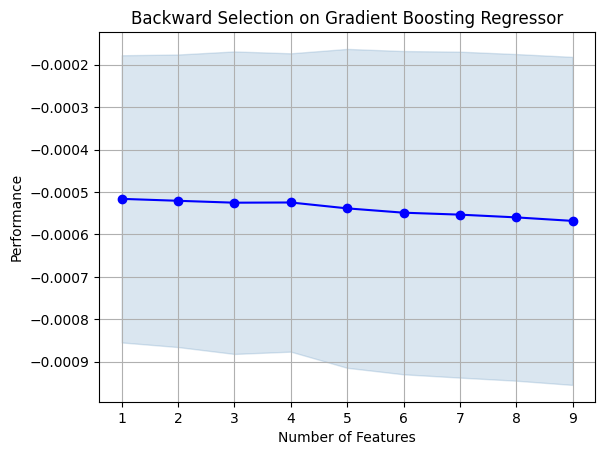

In [23]:
#Prepare the plot
fig1 = plot_sfs(sfs_results.get_metric_dict(),kind="std_dev")
plt.title("Backward Selection on Gradient Boosting Regressor")
plt.grid()

In [24]:
#Let us try to tune our model
from sklearn.model_selection import RandomizedSearchCV

In [142]:
#Before we try tune our model, let's first create a train and test set
train_X = scaled_data.loc[:(scaled_data.shape[0]//2),:]
train_y = market_data.loc[:(market_data.shape[0]//2),"Target"]
test_X = scaled_data.loc[(scaled_data.shape[0]//2):,:]
test_y = market_data.loc[(market_data.shape[0]//2):,"Target"]

In [55]:
#Time the proces
import time

start_time = time.time()

#Prepare the tuning object
tuner = RandomizedSearchCV(GradientBoostingRegressor(),
                          {
                              "loss": ["squared_error","absolute_error","huber"],
                              "learning_rate": [0,(10.0 ** -1),(10.0 ** -2),(10.0 ** -3),(10.0 ** -4),(10.0 ** -5),(10.0 ** -6),(10.0 ** -7)],
                              "n_estimators": [5,10,25,50,100,200,500,1000],
                              "max_depth": [1,2,3,5,9,10],
                              "min_samples_split":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                              "criterion":["friedman_mse","squared_error"],
                              "min_samples_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                              "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
                              "max_features":[1,2,3,4,5,20],
                              "max_leaf_nodes": [2,3,4,5,10,20,50,90,None],
                              "min_impurity_decrease": [0,1,10,(10.0 ** 2),(10.0 ** 3),(10.0 ** 4)]
                          },
                          cv=5,
                          n_iter=1000,
                          return_train_score=False,
                          scoring="neg_mean_squared_error"
                          )

In [56]:
#Tune the GradientBoostingRegressor
tuner.fit(train_X,train_y)

end_time = time.time()

print(f"Process completed in {end_time - start_time} seconds.")

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
475 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
475 fits failed with the following error:
Traceback (most recent call last):
  File "Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\base.py", line 666, in _validate_params

Process completed in 2818.4182443618774 seconds.


In [57]:
#Let's observe the results
tuner_results = pd.DataFrame(tuner.cv_results_)
params = ["param_loss",
          "param_learning_rate",
          "param_n_estimators",
          "param_max_depth",
          "param_min_samples_split",
          "param_criterion",
          "param_min_samples_leaf",
          "param_max_features",
          "param_max_leaf_nodes",
          "param_min_impurity_decrease",
          "param_min_weight_fraction_leaf",
          "mean_test_score"]
tuner_results.loc[:,params].sort_values(by="mean_test_score",ascending=False)

param_loss param_learning_rate param_n_estimators param_max_depth  \
111  absolute_error                0.01                500               3   
812   squared_error                 0.1                 50               3   
39   absolute_error                 0.1                100               9   
968           huber                 0.1                 25               1   
921  absolute_error                 0.1                 25               3   
..              ...                 ...                ...             ...   
966  absolute_error             0.00001                100               1   
970           huber                   0                200               3   
972   squared_error                0.01                  5              10   
980   squared_error                0.01                 10               3   
993  absolute_error            0.000001                 50               3   

    param_min_samples_split param_criterion param_min_samples_leaf  \
111                     0.4    friedman_mse                    0.1   
812                     0.7    friedman_mse                    0.2   
39                      0.4   squared_error                    0.3   
968                     0.6    friedman_mse                    0.1   
921                     0.1    friedman_mse                    0.1   
..                      ...             ...                    ...   
966                       1    friedman_mse                    0.9   
970                       1    friedman_mse                    0.5   
972                       1   squared_error                    0.7   
980                       1   squared_error                    0.6   
993                       1   squared_error                    0.7   

    param_max_features param_max_leaf_nodes param_min_impurity_decrease  \
111                  2                   10                           1   
812                  4                   90                           0   
39                  20                   50                           0   
968                  2                   10                           0   
921                  5                    2                       100.0   
..                 ...                  ...                         ...   
966                  3                    5                          10   
970                 20                   50                      1000.0   
972                  3                 None                          10   
980                  3                    4                           1   
993                  3                 None                     10000.0   

    param_min_weight_fraction_leaf  mean_test_score  
111                            0.0    -6.836891e-07  
812                            0.0    -7.935175e-07  
39                             0.3    -9.735044e-07  
968                            0.0    -1.154375e-06  
921                            0.2    -1.181536e-06  
..                             ...              ...  
966                            0.5              NaN  
970                            0.3              NaN  
972                            0.3              NaN  
980                            0.2              NaN  
993                            0.1              NaN  

[1000 rows x 12 columns]

In [58]:
#Best parameters we found
tuner.best_params_

{'n_estimators': 500,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 0.4,
 'min_samples_leaf': 0.1,
 'min_impurity_decrease': 1,
 'max_leaf_nodes': 10,
 'max_features': 2,
 'max_depth': 3,
 'loss': 'absolute_error',
 'learning_rate': 0.01,
 'criterion': 'friedman_mse'}

In [60]:
#Let's see if we can't find better parameters
#We may be overfitting the training data!
from scipy.optimize import minimize

In [125]:
#Define the objective function
def objective(x):
    #Create a dataframe to store our new accuracy
    current_error = pd.DataFrame(index=[0],columns=["error"])
    #x is an array of possible values to use for our Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=500,
                                      min_impurity_decrease=1,
                                      max_leaf_nodes=10,
                                      max_features=2,
                                      max_depth=3,
                                      loss="absolute_error",
                                      criterion="friedman_mse",
                                      min_weight_fraction_leaf=x[0],
                                      min_samples_split=x[1],
                                      min_samples_leaf=x[2],
                                      learning_rate=x[3])
    model.fit(train_X.loc[:,:],train_y.loc[:])
    current_error.iloc[0,0] = root_mean_squared_error(train_y.loc[:],model.predict(train_X.loc[:,:]))
    #Record our progress
    mean_error = current_error.loc[:].mean()
    #Return the average error
    return mean_error

In [126]:
#Let's optimize these parameters again
#Fist define the bounds
bounds = ((0.0,0.5),(0.3,0.5),(0.001,0.2),(0.001,0.1))

#Then define the starting points for the L-BFGS-B algorithm
pt = np.array([tuner.best_params_["min_weight_fraction_leaf"],
               tuner.best_params_["min_samples_split"],
               tuner.best_params_["min_samples_leaf"],
               tuner.best_params_["learning_rate"]
              ])

In [127]:
pt

array([0.  , 0.4 , 0.1 , 0.01])

In [128]:
lbfgs = minimize(objective,pt,bounds=bounds,method="L-BFGS-B")

In [129]:
lbfgs

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.0005766670348377334
        x: [ 5.586e-06  4.000e-01  1.000e-01  1.000e-02]
      nit: 3
      jac: [-6.216e+00 -4.871e+02 -2.479e+02  8.882e+01]
     nfev: 180
     njev: 36
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [147]:
#Let us now see how well we're performing on the validation set
linear_regression = LinearRegression()
default_gbr = GradientBoostingRegressor()
grid_search_gbr = GradientBoostingRegressor(n_estimators=500,
                                      min_impurity_decrease=1,
                                      max_leaf_nodes=10,
                                      max_features=2,
                                      max_depth=3,
                                      loss="absolute_error",
                                      criterion="friedman_mse",
                                      min_weight_fraction_leaf=0,
                                      min_samples_split=0.4,
                                      min_samples_leaf=0.1,
                                      learning_rate=0.01
                                      )
lbfgs_grid_search_gbr = GradientBoostingRegressor(
                                      n_estimators=500,
                                      min_impurity_decrease=1,
                                      max_leaf_nodes=10,
                                      max_features=2,
                                      max_depth=3,
                                      loss="absolute_error",
                                      criterion="friedman_mse",
                                      min_weight_fraction_leaf=lbfgs.x[0],
                                      min_samples_split=lbfgs.x[1],
                                      min_samples_leaf=lbfgs.x[2],
                                      learning_rate=lbfgs.x[3]
                                     )
                                           

In [143]:
#Linear Regression
linear_regression.fit(train_X,train_y)
root_mean_squared_error(test_y,linear_regression.predict(test_X))

0.0004316639180314571

In [144]:
#Default Gradient Boosting Regressor
default_gbr.fit(train_X,train_y)
root_mean_squared_error(test_y,default_gbr.predict(test_X))

0.0005736065907809492

In [145]:
#Random Search Gradient Boosting Regressor
grid_search_gbr.fit(train_X,train_y)
root_mean_squared_error(test_y,grid_search_gbr.predict(test_X))

0.000591328828681271

In [148]:
#L-BFGS-B Random Search Gradient Boosting Regressor
lbfgs_grid_search_gbr.fit(train_X,train_y)
root_mean_squared_error(test_y,lbfgs_grid_search_gbr.predict(test_X))

0.0005914811558189813

In [149]:
#We failed to beat the linear regression model, in such cases we should pick the linear model!
#However for demonstrational purposes we'll pick the gradient boosting regressor
#Let's export the default GBR to ONNX format
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import onnx

In [159]:
    #We need to save the scale factors for our inputs
    scale_factors = pd.DataFrame(index=["mean","standard deviation"],columns=all_predictors)
    
    for i in np.arange(0,len(all_predictors)):
        scale_factors.iloc[0,i] = market_data.iloc[:,i+2].mean()
        scale_factors.iloc[1,i] = market_data.iloc[:,i+2].std()
        market_data.iloc[:,i+2] = ((market_data.iloc[:,i+2] - market_data.iloc[:,i+2].mean()) / market_data.iloc[:,i+2].std())
    
    scale_factors

Open      High       Low     Close        M5      M15  \
mean                1.093001  1.093072  1.092928  1.093001  0.000015  0.00002   
standard deviation  0.001799  0.001811  0.001785  0.001798  0.000995  0.00171   

                         M30        H1        D1  
mean                0.000015  0.000153 -0.000878  
standard deviation  0.002436  0.003768  0.031724

In [160]:
market_data

index                 Time      Open      High       Low     Close  \
0      5000  2024.08.05 15:32:00  2.239828  2.185968  2.124112  2.146571   
1      4999  2024.08.05 15:33:00  2.145319  2.235676  2.191338  2.268933   
2      4998  2024.08.05 15:34:00  2.267625  2.395848  2.325788  2.452476   
3      4997  2024.08.05 15:35:00  2.451085  2.428987  2.449035  2.407981   
4      4996  2024.08.05 15:36:00  2.389932  2.412418  2.421024  2.380171   
...     ...                  ...       ...       ...       ...       ...   
4976     24  2024.08.09 02:38:00 -0.740002 -0.774448 -0.710556 -0.740063   
4977     23  2024.08.09 02:39:00 -0.740002 -0.774448 -0.710556 -0.745625   
4978     22  2024.08.09 02:40:00 -0.745561 -0.774448 -0.716158 -0.745625   
4979     21  2024.08.09 02:41:00 -0.745561 -0.779972 -0.710556 -0.745625   
4980     20  2024.08.09 02:42:00 -0.745561 -0.746833 -0.710556 -0.712253   

            M5       M15       M30        H1        D1   Target  
0     0.256421 -0.800778 -0.219652  0.864494 -0.224510  1.09856  
1     0.145857 -0.941089 -0.190917  1.554593 -0.322226  1.09883  
2     0.005140 -0.894319 -0.071873  1.636874 -0.095272  1.09872  
3     0.155908 -0.508464 -0.240177  1.119300 -0.328531  1.09862  
4     0.105652 -0.502618 -0.092398  1.286516 -0.350596  1.09865  
...        ...       ...       ...       ...       ...      ...  
4976 -0.115475  0.806951 -0.006194  0.400005  0.213639  1.09151  
4977 -0.075270  0.912184 -1.492189  0.421239  0.258715  1.09151  
4978  0.015191  1.590353 -1.401880  0.453089  0.093857  1.09141  
4979 -0.095373  1.485120 -1.738486  0.296490  0.436181  1.09145  
4980 -0.115475  0.994032 -1.561973  0.299144  0.659038  1.09152  

[4981 rows x 12 columns]

In [158]:
#Now we will write out the scale factors to CSV 
scale_factors.to_csv("/home/volatily/.wine/drive_c/Program Files/MetaTrader 5/MQL5/Files/multiple_timeframe_scale.csv")

In [163]:
#Define our initial types
initial_types = [("float_input",FloatTensorType([1,test_X.shape[1]]))]

In [161]:
#Fit the model on all the data we have 
model = GradientBoostingRegressor().fit(market_data.loc[:,all_predictors],market_data.loc[:,"Target"])

In [164]:
#Create the ONNX representation
onnx_model = convert_sklearn(model,initial_types=initial_types,target_opset=12)

In [165]:
#Now save the ONNX model
onnx_model_name = "GBR_M1_MultipleTF_Float.onnx"
onnx.save(onnx_model,onnx_model_name)

In [2]:
#Import netron so we can visualize the model
import netron

In [3]:
netron.start(onnx_model_name)

Serving 'GBR_M1_MultipleTF_Float.onnx' at http://localhost:8080


('localhost', 8080)